* material to know by heart

* watch out with the jupyter notebook!

### NUMERICAL INTEGRATION

Integration is the second fundamental concept of calculus (along with differentiation). Numerical approaches are generally more useful here than in differentiation as the antiderivative procedure (analytically) is often much more complex, or even not possible. In this section we will cover some basic schemes, including Trapezoid method, Simpson method, Clenshaw-Curtis (scipy.integrate.quad) and Monte Carlo method.

### Indefinite integral

$$ I = \int f(x) dx$$ 


the results is a function

### Definite integral 

the results is a number

Geometrical interpretation of a definite integral: area under the curve

$$ I = \int_{a}^{b}f(x) dx$$ 

<img src="imgs/integral_area.png" width="200" />


*strip $\approx slice$


###  How can we approximate this numerically

$$ I = \int_{a}^{b}f(x) dx = \lim_{\Delta x \rightarrow 0} \sum_{i=1}^{N}f_i(x) \Delta x $$ 

* because the area of each strip is $f(x_i) * \Delta x_i$ 

* in order to get better approximation we make more strips
<img src="imgs/integral_area2.png" width="400" />

### Generalization

* But not only the number of strips improves the approximation but also the shape of the strip 

* We can replace a complicated function or a tabulated data with an approximating ($\color{red}{\text{interpolating}}$) function.... sounds familiar?

$$ I = \int_{a}^{b}f(x) dx \approx \int_{a}^{b}f_n(x) dx $$ 

where $f_n(x)$ is n-th order polynomial


<table><tr>
<td> <img src="imgs/1polynomial.png" width="200" /> </td>
<td> <img src="imgs/2polynomial.png" width="200" /> </td>
</tr></table>

### Using 1st order Lagrange polynomial: Trapezoid approximation

<img src="imgs/trapezoid.png" width="200" />

$$ I \approx  \frac{f(a)+f(b)}{2} \Delta x  = \frac{(b-a)}{2}[f(a)+f(b)]$$

* which is average height * width
* Trapezoid approximation uses two points and can integrate first order polynomials exactly

### Derivation of the Trapezoid approximation

Trapezoid and other approximations can be derived from the Lagrange polynomial because we said that:

$$ I = \int_{a}^{b}f(x) dx \approx \int_{a}^{b}f_n(x) dx $$
where $f_n(x)$ is n-th order polynomial

#### Reminder of Lagrange Polynomials 

$$P_n(x)=\sum_{i=0}^{n}L_i(x) f(x_i) \quad \text{where} \quad L_i(x)=\prod_{j=0,j \neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$$

example for n=1

$$P_1(x)=\frac{(x-x_1)}{(x_0-x_1)}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)$$

example for n=2

$$P_2(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_2)$$

### Derivation details:

* The trapezoid approximation is when $n=1$ for $\int_{a}^{b}f_n(x) dx $

\begin{eqnarray}
\int_{a=x_0}^{b=x_1} f(x) \ dx &\approx& \int_{x_0}^{x_1} P_1(x) \ dx + E_n(n,x)^* \\
&\approx& \int_{x_0}^{x_1} \left[ \frac{(x-x_1)}{(x_0-x_1)}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1) \right]  dx + \frac{1}{2} f''(\zeta) \int_{x_0}^{x_1} (x-x_0)(x-x_1) dx \\
&\approx& \left[ \frac{(x-x_1)^2}{2(x_0-x_1)}f(x_0) + \frac{(x-x_0)^2}{2(x_1-x_0)}f(x_1) \right]_{x_0}^{x_1}  + \frac{1}{2} f''(\zeta) \int_{x_0}^{x_1} (x-x_0)(x-x_1) dx \\
&\approx& -\frac{(x_0-x_1)^2}{2(x_0-x_1)}f(x_0) + \frac{(x_1-x_0)^2}{2(x_1-x_0)}f(x_1)  + \frac{1}{2} f''(\zeta) \left( -\frac{h^3}{6} \right) \\
&\approx& \frac{h}{2}[f(x_0)+f(x_1)] - \frac{h^3}{12} f''(\zeta) \\
\end{eqnarray}

hence:

$$ \int_{a}^{b} f(x) \ dx = \frac{h}{2}[f(a)+f(b)] - \frac{h^3}{12} f''(\zeta)  \approx \frac{b-a}{2}[f(a)+f(b)] $$

*If we replace the function f(x) with the polynomial $P(x)$, we would like to know what 
error we are making. Hence he error is $E_n(x,f) = f(x) - P(x)$, which comes from the Taylor expansion formula.

### This is called Newton-Cotes formula for n=1. Or in other words 
$\color{red}{\text{Trapezoid formula:}}$

$$ \int_{a}^{b} f(x) \ dx \approx \frac{b-a}{2}[f(a)+f(b)] \approx \frac{h}{2}[f(a)+f(b)] $$

### Multiple application of the Trapezoid formula

<img src="imgs/trapezoid_multiple.png" width="300" />

$$ \int_{a}^{b} f(x) \ dx =  \int_{x_0}^{x_1} f(x) \ dx + \int_{x_1}^{x_2} f(x) \ dx + \int_{x_2}^{x_3} f(x) \ dx + \cdots + \int_{x_{n-1}}^{x_n} f(x) \ dx $$

$$ I \approx  \frac{h}{2}[f(x_0)+f(x_1)] + \frac{h}{2}[f(x_1)+f(x_2)] + \frac{h}{2}[f(x_2)+f(x_3)] + \cdots \frac{h}{2}[f(x_{n-1})+f(x_n)]$$

$$I \approx \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n)\right]$$

### Using 2st order Lagrange polynomial: Simpson 1/3 approximation
(3/8 we didnt derive)
* we can follow exactly the same steps as for the derivation of the trapezoid formula but instead of n=1, we substitute n=2: 

* we can see that the curve approximating between two points is not straingt but parabolic 

<img src="imgs/simpson.png" width="300" />

$$ I = \frac{h}{3}[f(x_0)+ 4 f(x_1) + f(x_2)] - \frac{h^5}{90} f''''(\zeta)$$

*Simpson 1/3 approximation uses three points and can integrate second order polynomials exactly

h=0.01

### Multiple application of the Simpson 1/3 formula

<img src="imgs/simpson_multiple.png" width="300" />

$$I \approx \frac{h}{3n} \left[ f(x_0) + 4\sum_{i=1,3,5}^{n-1} f(x_i) + 2\sum_{i=2,4,6}^{n-1} f(x_i) + f(x_n)\right]$$

odd numbers =1,3,5,7,
even numbers = 0,2,4,6,8

Simpson's approximation uses three points and can integrate second order polynomials exactly

### Comparison between Trapezoid and Simpson approximations:
$\int_0^2 f(x) dx$

* Trapezoid: $ I \approx f(0)+ f(2) $
* Simpson: $ I \approx \frac{1}{3} [f(0)+ 4 f(1) + f(2)] $

if $f(x)=x^2$

* Trapezoid: $ \int_0^2 x^2 dx \approx 0^2+ 2^2 = 4 $
* Simpson: $ \int_0^2 x^2 dx \approx \frac{1}{3} [0^2 + 4 * 1^2 + 2^2] = \frac{8}{3} = 2.666666666$

<img src="imgs/trapezoid_simpson_comparison.png" width="500" />

* QUESTION: WHY IS THE SIMPSON APPROXIMATION GIVING EXACTLY THE SAME RESULT AS ANALYTICAL?

### Other methods than Trapezoid or Simpson
There are far more sophisticated methods than Simpson or Trapezoid.
One that is most commonly used in the sicpy library is called "quad" (quadrature $\sim$ integral) and can be imported by: 


import scipy.integrate  as  integrate 

I=integrate.quad(...)



The manual of the quad says: "For finite integration limits, the integration is performed using a Clenshaw-Curtis method which uses Chebyshev moments. ... If one of the integration limits is infinite, then a Fourier integral is computed (assuming w neq 0)."
... "quad is implementeed using a technique from the Fortran library QUADPACK." \
*rather complicated

https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

### Implementing trapezoid rule:

In [1]:
### For the curious ones: Implementing trapezoid rule:
import numpy as np
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [2]:
trapz(np.sin,0,np.pi,50)

1.9993419830762618

## Convenient numerical integration using python scipy package
* in real life there are two different kind of problems we ca encounter

    $\rightarrow$ a) we have data (experimental) point x, y and we want to find the integral (area under the curve)

    $\rightarrow$ b) we have the analytical form of the fuction: x, y and we want to find the integral (area under the curve)



### a) Lets assume that we have a set of points (here w generate using np.sin but we can actually use any values)

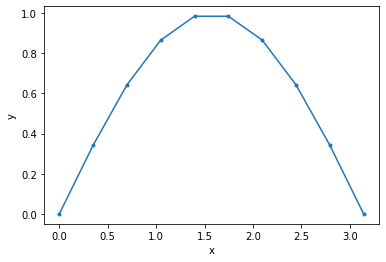

In [3]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,np.pi,10)
y = np.sin(x)
fig, ax = plt.subplots(1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x,y,marker='.')

In [4]:
import scipy.integrate as integrate
import numpy as np

I1 = integrate.trapz(y, x)
I3 = integrate.simps(y,x)
print('Trapezoid (scipy)',I1)
print('Simpson (scipy),',I3)

#compare with https://www.wolframalpha.com/input/?i=integrate+sin+x+dx+from+x%3D0+to+pi

Trapezoid (scipy) 1.9796508112164835
Simpson (scipy), 1.9995487365804032


### b) Lets assume that we know the function:
Example 1.

In [5]:
import scipy.integrate as integrate
#def integrand(x, a, b):
#    return a*x**3 + b

def integrand(x, a, b):
    return a + b * np.sin(x)

a = 0
b = 1
I, error = integrate.quad(integrand, 0, np.pi, args=(a,b))
print(I,'+/-',error)

2.0 +/- 2.220446049250313e-14


[0, 1, 2, 3, 4]
[3.141592653589793, 5.141592653589792, 7.141592653589792, 9.141592653589795, 11.141592653589791]


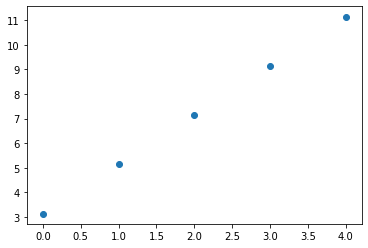

In [6]:
## If we want to loop through arguments:
a=1.0
Is=[]
bs=[0,1,2,3,4]
for b in bs:
    I,error = integrate.quad(integrand, 0, np.pi, args=(a,b))
    Is.append(I)
fig,ax = plt.subplots(1,1)
ax.scatter(bs,Is)
print(bs)
print(Is)
# this can be also done by np.vectorize()

### Example 2
Solve numerically following integral

$ I= \int_{0}^{10}\frac{300* x}{1 + e^x}$

In [7]:
def integrand2(x):
    return 300*x/(1+ np.exp(x))

I,error = integrate.quad(integrand2, 0, 10)
print(I)

246.59029350523798


### Example 3 

Solve the following integral numerically

$$I = \int_{1}^{9} \frac{b x^2 + x^2 \sqrt(x) - 1}{x^2} dx$$

Initially b=2

Then make a plot for $I$ vs 10 different values of b=[0,1,2,3,4,5,6,7,8,9] 

32.44444444444443
32.44444444444444


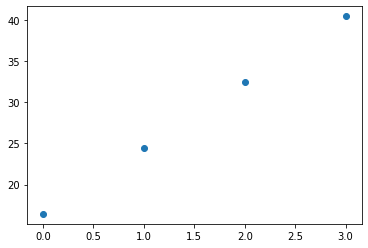

In [8]:
def integrand3(x,b):
    return ((b*x**2 + x**2 * np.sqrt(x) - 1)/x**2)
b=2
I,error = integrate.quad(integrand3, 1, 9,args=(b))
print(I)
print(32+4/9)
### integrate (2*x^2 + x^2 * sqrt(x) -1 )/(x^2) dx from x=0 to pi

Is=[]
bs=[0,1,2,3]
for b in bs:
    I,error = integrate.quad(integrand3, 1, 9, args=(b))
    Is.append(I)
fig,ax = plt.subplots(1,1)
ax.scatter(bs,Is)


## Monte Carlo technique of integration

Imagine, you want to calculate the area of a circle, but you didn’t know anything about $\pi$. Instead, you chose to surround the circle by a square, for which you do know how to calculate the area.

<table><tr>
<td> <img src="imgs/circ1.png" width="200" /> </td>
</tr></table>

Now, we throw darts at the paper and we take a tally of total number of darts that were thrown as well as the darts that land inside the circle.

*the key here is the randomness!!!

<table><tr>
<td> <img src="imgs/circ2.png" width="200" /> </td>
<td> <img src="imgs/circ3.png" width="200" /> </td>
<td> <img src="imgs/circ5.png" width="200" /> </td>
</tr></table>



* we throw one time: $\ $  $\rightarrow$ inside the circe 01, total 01
* we throw three times: $\rightarrow$ inside the circe 02, total 03
* we throw fifty times: $\rightarrow$ inside the circe 40, total 50



So, 40 out of 50 darts are inside the circle, or in other words: $80 \%$. 

So, assuming the darts were thrown randomly, I could approximate the area of the circle by $A_c\approx 0.8 A_s$.

As we make square 2x2 then the radius is 1 and the area will be exactly $A_c=\pi$ 

If the square has an area of 4 units, then
$ A_c= 4.0 * 0.8 = \color{red}{\text{3.2}}  \approx \pi r^2 = 3.1415$

*but we threw only 50 times! What happens if we throw million times?

In [9]:
import math, random
 
def isPointInCircle(x, y, Cx, Cy, radius):
    return math.sqrt((x - Cx)**2 + (y - Cy)**2) <= radius
 
def approximateCircleArea(radius, numberOfPoints):
    squareSide = radius*2
    Cx = radius
    Cy = radius
 
    pointsInside = 0
    for i in range(numberOfPoints):
        x = random.random()*squareSide
        y = random.random()*squareSide
 
        if (isPointInCircle(x, y, Cx, Cy, radius)):
            pointsInside = pointsInside + 1
 
    return pointsInside / numberOfPoints * squareSide**2

In [10]:
pimc=approximateCircleArea(1.0,10000000)
print('Monte Carlo pi: ', format(pimc, ".5f"))
print('Numpy pi      : ', format(np.pi, ".5f"))

Monte Carlo pi:  3.14265
Numpy pi      :  3.14159


In [11]:
print('error:', format(abs((np.pi-pimc)/np.pi)*100, "2.2") ,'%')

error: 0.034 %


## HOMEWORK 

For small angles the period of the pendulum can be found using:

$T=2 \pi \sqrt{\frac{l}{g}}$

but for large amplitudes this equation is no longer valid and different formula has to be used:

$T=4 \sqrt{\frac{l}{g}} K(k)$ where $k=sin\left(\frac{\theta_0}{2}\right)$ ($\theta_0$ is an initial angle)

and $K$ is an eliptic integral 

$$K(k)=\int_{0}^{2 \pi} \frac{d \varphi}{\sqrt{1 - k^2 sin^2(\varphi)}}$$




Make a plot of T vs $\theta_0$

$\theta_0=[0,10,20,30,40,50,60]$ degrees

assume:
l=0.2
g=9.81

*For more details on eliptic integrals see:

https://en.wikipedia.org/wiki/Elliptic_integral

https://www.am1.us/wp-content/uploads/Documents/U11610_Pendulums_and_Elliptic_Integrals_new.pdf